In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np

## Torque

In [148]:
df_old=pd.read_csv('../outp/mdisc.dat',header=None,delimiter=' ')
df_old.columns=['t','id','x','y','Vx','Vy','w', 'theta']
df_old

,t,id,x,y,Vx,Vy,w,theta
0,0.0,0,-0.362500,-0.362500,-0.000119,-0.000119,0.026879,0.00
1,0.0,1,-0.181250,-0.362500,-0.000059,-0.000119,0.026879,0.00
2,0.0,2,0.000000,-0.362500,0.000000,-0.000119,0.026879,0.00
3,0.0,3,0.181250,-0.362500,0.000059,-0.000119,0.026879,0.00
4,0.0,4,0.362500,-0.362500,0.000119,-0.000119,0.026879,0.00
...,...,...,...,...,...,...,...,...
12495,49.9,20,0.062584,0.182812,1.298530,-1.167340,-46.537800,-1741.74
12496,49.9,21,-0.049282,-0.462475,0.868567,-1.223690,-40.546200,-1965.86
12497,49.9,22,0.183162,0.322552,0.741945,-1.463050,-60.532700,-1812.51
12498,49.9,23,-0.339524,0.060762,-0.036013,-1.222490,-49.702100,-1936.10


Text(0, 0.5, 'Velocidad angular $\\omega$')

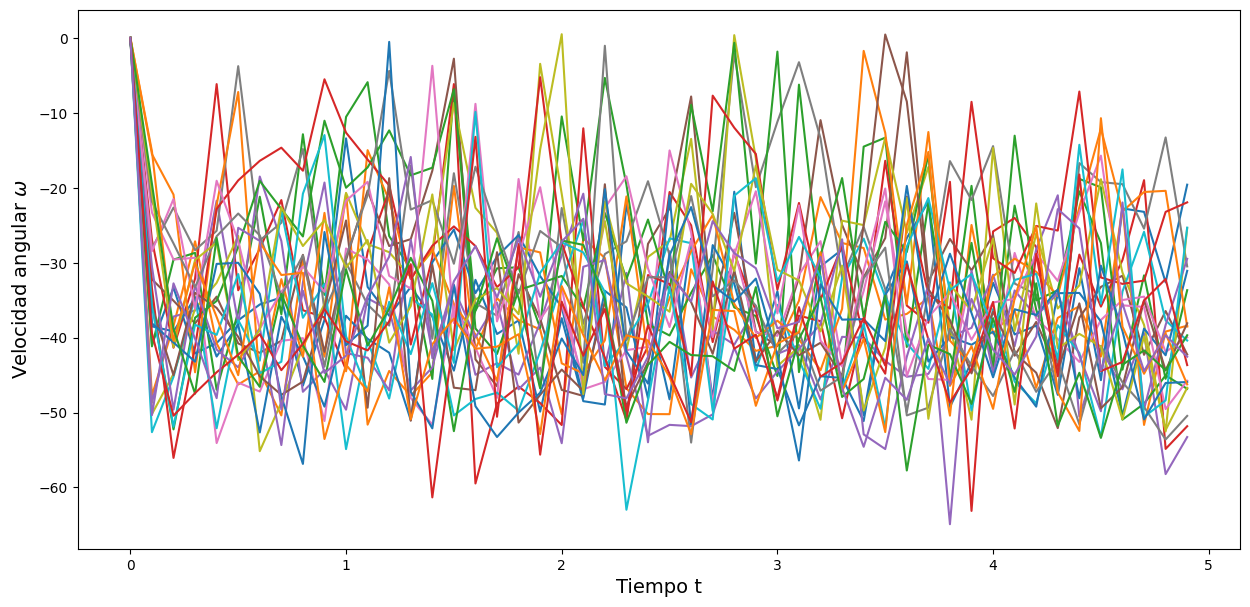

In [149]:
plt.figure(figsize=(15,7))
for i in df_old['id'].unique():
    plt.plot(df_old[(df_old['id']==i) & (df_old["t"] < 5)]['t'].values,df_old[(df_old['id']==i) & (df_old["t"] < 5)]['w'].values)

plt.xlabel('Tiempo t',fontsize=14)
plt.ylabel('Velocidad angular $\omega$',fontsize=14)

In [150]:
df = df_old[df_old["t"] > 15]
df

,t,id,x,y,Vx,Vy,w,theta
3775,15.1,0,-0.412316,-0.113208,-0.717986,1.149910,-46.0093,-580.211
3776,15.1,1,-0.391271,0.075033,1.193580,1.187990,-52.8759,-616.443
3777,15.1,2,-0.289815,-0.224698,-0.084459,1.029440,-40.3843,-537.995
3778,15.1,3,-0.064634,-0.458980,0.509220,-0.491348,-44.3939,-537.736
3779,15.1,4,-0.171670,-0.147683,0.582265,-1.297370,-34.0352,-562.583
...,...,...,...,...,...,...,...,...
12495,49.9,20,0.062584,0.182812,1.298530,-1.167340,-46.5378,-1741.740
12496,49.9,21,-0.049282,-0.462475,0.868567,-1.223690,-40.5462,-1965.860
12497,49.9,22,0.183162,0.322552,0.741945,-1.463050,-60.5327,-1812.510
12498,49.9,23,-0.339524,0.060762,-0.036013,-1.222490,-49.7021,-1936.100


In [151]:
m=1
N=len(df['id'].unique())
V=np.sqrt(df['Vx']**2+df['Vy']**2)
Vprom=np.mean(V)
Tt=m*0.5*(V-Vprom)**2

Ttprom=np.mean(Tt)
print(Ttprom)

0.17873829577257508


Text(0.9, 0.9, '$\\phi=$0.25, ${T}_t=$0.17873829577257508')

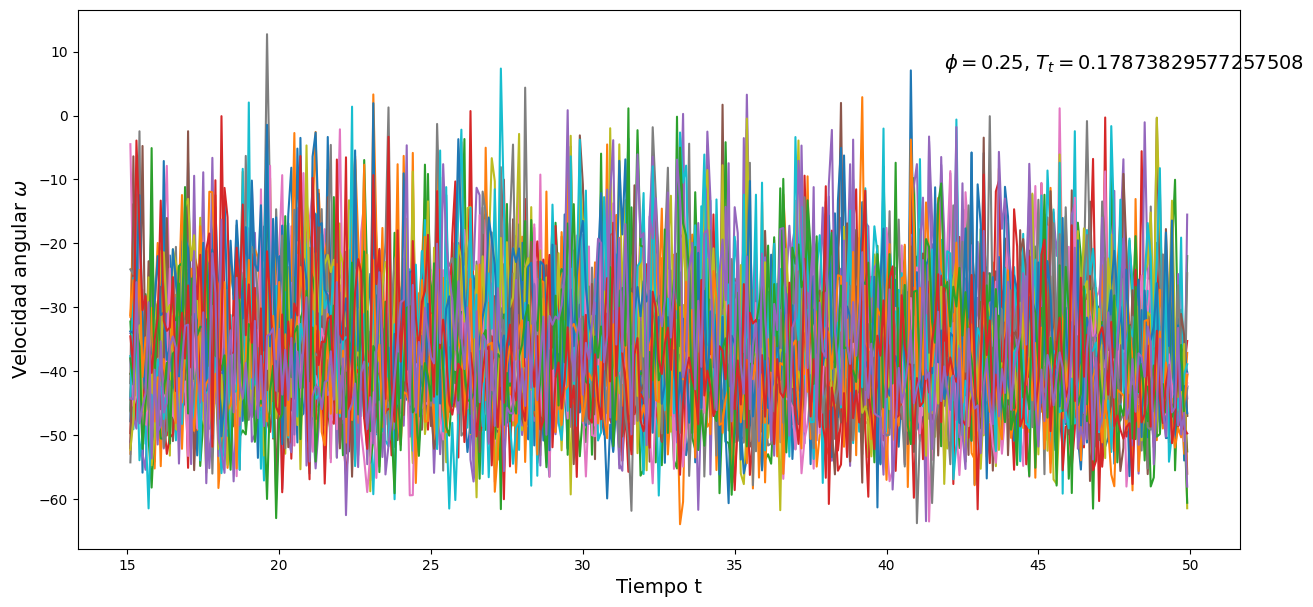

In [152]:
plt.figure(figsize=(15,7))
for i in df['id'].unique():
    plt.plot(df[df['id']==i]['t'].values,df[df['id']==i]['w'].values)

plt.xlabel('Tiempo t',fontsize=14)
plt.ylabel('Velocidad angular $\omega$',fontsize=14)
plt.text(0.9,0.9,'$\phi=$'+str(N/100)+', ${T}_t=$'+str(Ttprom),horizontalalignment='center',
         verticalalignment='center', transform=plt.gca().transAxes,fontsize=14)

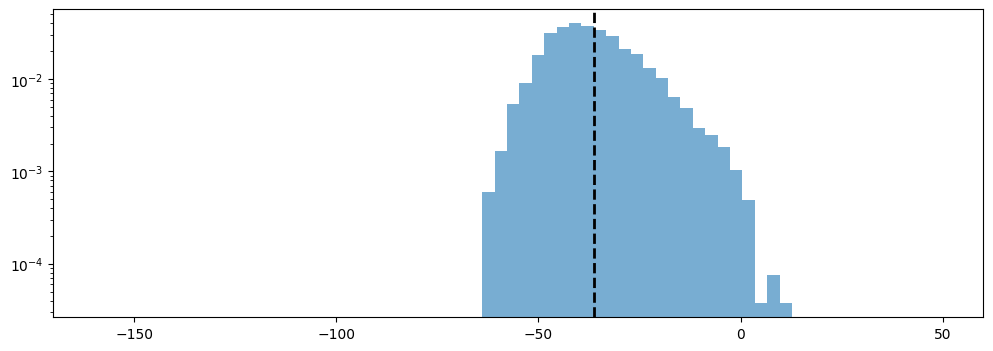

In [153]:
plt.figure(figsize=(12,4))
plt.hist(df['w'].values,density=True, bins=25, alpha=0.6)
#draw a vertical line in the mean of the data
plt.axvline(df['w'].mean(), color='k', linestyle='dashed', linewidth=2)
plt.xlim(-170, 60)
plt.yscale('log')
plt.show()

# Leer Datos

In [10]:
# Esta funcion due la mejor comportada en las pruebas realizadas abajo, si encontramos una mejor, se puede cambiar desde aqui facilemente
def autocorrelation(t, dt, list, denom): #< v(t) * v(t+dt) > / < v(t) * v(t) > #modificado para que lea varios discos
    shifts = np.arange(0, int(t/dt)+1, 1)
    autocorr = np.zeros(shifts.size)
    ids = list.index.unique().to_numpy()

    for i in shifts:
        for j in ids:
            autocorr[i] += np.nanmean( list.loc[j] * list.loc[j].shift(-i)) / denom
        #autocorr[i] = np.nanmean( list * list.shift(-i)) / denom
    autocorr = autocorr / ids.size
    return autocorr

In [11]:
# Read data from file
dif = pd.read_csv("../outp/dif.dat", sep=" ", header=None)
dif.columns = ["t", "id", "x", "y", "vx", "vy"]
dif.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

dif_dt = dif.loc[0]["t"].to_numpy()[1] - dif.loc[0]["t"].to_numpy()[0]
dif_tmax = dif.loc[0]["t"].to_numpy()[-1] 

dif_sigma = autocorrelation(0, dif_dt, dif["vx"], 1.0)[0] + autocorrelation(0, dif_dt, dif["vy"], 1.0)[0]
dif_corr = autocorrelation(dif_tmax, dif_dt, dif["vx"], dif_sigma) + autocorrelation(dif_tmax, dif_dt, dif["vy"], dif_sigma)

dif #verificar que se leyo bien

,t,x,y,vx,vy
id,,,,,
0,0.000,0.000000,0.000000,0.000000,0.000000
1,0.000,0.000000,0.000000,0.000000,0.000000
2,0.000,0.000000,0.000000,0.000000,0.000000
3,0.000,0.000000,0.000000,0.000000,0.000000
4,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
5,24.996,2.006970,-2.197360,-0.151634,-0.732952
6,24.996,0.795458,-8.303710,-1.005360,-1.709480
7,24.996,1.877710,0.013901,2.892110,-1.272130


In [12]:
# Read data from file
mag = pd.read_csv("../outp/mag.dat", sep=" ", header=None)
mag.columns = ["t", "id", "x", "y", "vx", "vy"]
mag.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

mag_dt = mag.loc[0]["t"].to_numpy()[1] - mag.loc[0]["t"].to_numpy()[0]
mag_tmax = mag.loc[0]["t"].to_numpy()[-1] 

mag_sigma = autocorrelation(0, mag_dt, mag["vx"], 1.0)[0] + autocorrelation(0, mag_dt, mag["vy"], 1.0)[0]
mag_corr = autocorrelation(mag_tmax, mag_dt, mag["vx"], mag_sigma) + autocorrelation(mag_tmax, mag_dt, mag["vy"], mag_sigma)

mag

,t,x,y,vx,vy
id,,,,,
0,0.000,0.000000,0.000000,0.000000,0.000000
1,0.000,0.000000,0.000000,0.000000,0.000000
2,0.000,0.000000,0.000000,0.000000,0.000000
3,0.000,0.000000,0.000000,0.000000,0.000000
4,0.000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...
5,24.996,-1.604390,-0.476702,2.024280,-0.736625
6,24.996,-0.687914,-0.194681,2.643360,-0.397817
7,24.996,-4.843500,4.052930,-0.653254,-0.002524


In [13]:
# Read data from file
fcen = pd.read_csv("../outp/fcen.dat", sep=" ", header=None)
fcen.columns = ["t", "id", "x", "y", "vx", "vy"]
fcen.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

fcen_dt = fcen.loc[0]["t"].to_numpy()[1] - fcen.loc[0]["t"].to_numpy()[0]
fcen_tmax = fcen.loc[0]["t"].to_numpy()[-1] 

fcen_sigma = autocorrelation(0, fcen_dt, fcen["vx"], 1.0)[0] + autocorrelation(0, fcen_dt, fcen["vy"], 1.0)[0]
fcen_corr = autocorrelation(fcen_tmax, fcen_dt, fcen["vx"], fcen_sigma) + autocorrelation(fcen_tmax, fcen_dt, fcen["vy"], fcen_sigma)

fcen

,t,x,y,vx,vy
id,,,,,
0,0.000,0.000000,0.00000,0.000000,0.000000
1,0.000,0.000000,0.00000,0.000000,0.000000
2,0.000,0.000000,0.00000,0.000000,0.000000
3,0.000,0.000000,0.00000,0.000000,0.000000
4,0.000,0.000000,0.00000,0.000000,0.000000
...,...,...,...,...,...
5,24.996,-0.106003,-1.45058,1.835890,-3.252090
6,24.996,-1.897100,4.68581,-2.650860,4.428650
7,24.996,0.601211,4.01704,3.515860,0.057593


# Graficas importantes

(0.0, 10.0)

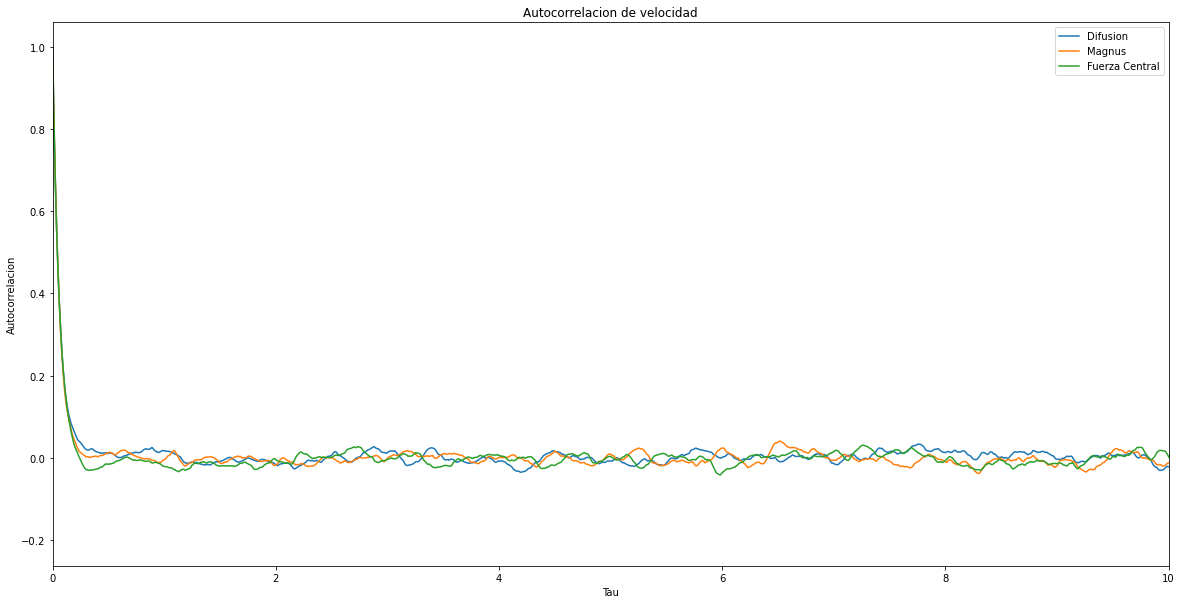

In [22]:
fig = plt.figure(figsize=(20, 10))
plt.plot(dif["t"].unique(), dif_corr, label="Difusion")
plt.plot(mag["t"].unique(), mag_corr, label="Magnus")
plt.plot(fcen["t"].unique(), fcen_corr, label="Fuerza Central")
plt.xlabel("Tau")
plt.ylabel("Autocorrelacion")
plt.title("Autocorrelacion de velocidad")
plt.legend()
plt.xlim(0, 10)
#plt.savefig("../outp/Corr.png", facecolor='w', edgecolor='none')

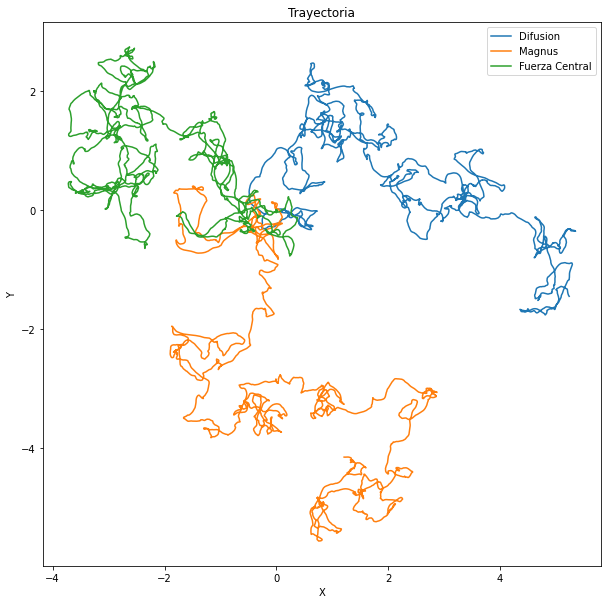

In [17]:
fig = plt.figure(figsize=(10, 10))
plt.plot(dif.loc[0]["x"].to_numpy(), dif.loc[0]["y"].to_numpy(), label="Difusion")
plt.plot(mag.loc[0]["x"].to_numpy(), mag.loc[0]["y"].to_numpy(), label="Magnus")
plt.plot(fcen.loc[0]["x"].to_numpy(), fcen.loc[0]["y"].to_numpy(), label="Fuerza Central")
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Trayectoria")
plt.legend()

# Pruebas

Si se quieren hacer mas pruebas, porfavor comentarlas deaspues para evitar correr celdas innecesarias. Solo se deben quitar las comillas del comienzo

In [36]:
"""
# Read data from file
data = pd.read_csv("../outp/dif.dat", sep=" ", header=None)
data.columns = ["t", "id", "x", "y", "vx", "vy"]
data.set_index("id", inplace=True)

#//print(data.index.unique().to_numpy())

dtmin = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 

sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
t = data.loc[0]["t"].to_numpy()[-1]

#comparar funciones de autocorrelacion
def autocorrelation_lib(t, df, denom): #< v(t) * v(t+dt) > / < v(t) * v(t) >
    shifts = np.arange(0, int(t/dtmin)+1, 1)
    autocorr = np.zeros(shifts.size)
    for i in shifts:
        autocorr[i] = np.nanmean( df["vx"] * df["vx"].shift(-i) + df["vy"] * df["vy"].shift(-i) ) / denom
    return autocorr

def autocorrelation_lib2(t,list, denom): #< v(t) * v(t+dt) > / < v(t) * v(t) > #modificado para que tener la misma forma que la funciuon de profe
    shifts = np.arange(0, int(t/dtmin)+1, 1)
    autocorr = np.zeros(shifts.size)
    for i in shifts:
        autocorr[i] = np.nanmean( list * list.shift(-i)) / denom
    return autocorr

def autocorrelation(dt, df): 
    v = np.sqrt(df["vx"]**2 + df["vy"]**2)
    n = len(v)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:] / np.arange(n, 0, -1)
    return result * dt  #! la funcion no debe depender de dt tan fuertemente

def autocorrelation2(dt, df):
    v = np.sqrt(df["vx"]**2 + df["vy"]**2)
    result = np.correlate(v, v, mode='full')
    result = result[result.size // 2:]
    return result

def autocorrelation_prof(array1, array2 ,denom, ilag):
    if ilag>0:
        return np.mean(array1[:-ilag] * array2[ilag:])/denom
    else:
        return np.mean(array1 * array2)/denom
#"""

4167 4167 4167 4167 4167


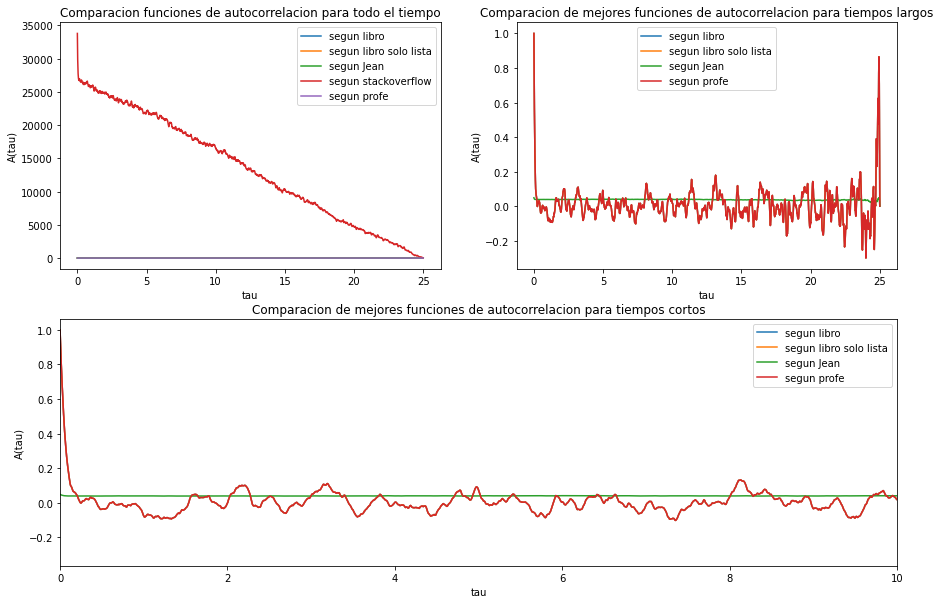

In [49]:
"""
sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
corr = autocorrelation_lib(t, data, sigma)

sigma = autocorrelation_lib2(0, data["vx"], 1.0)[0] + autocorrelation_lib2(0, data["vy"], 1.0)[0]
corr2 = autocorrelation_lib2(t, data["vx"], sigma) + autocorrelation_lib2(t, data["vy"], sigma)

corr3 = autocorrelation(dtmin, data)
corr4 = autocorrelation2(dtmin, data)

corr5 = np.zeros(data["vx"].size)
A0 = autocorrelation_prof(data["vx"], data["vx"], 1.0, 0) + autocorrelation_prof(data["vy"], data["vy"], 1.0, 0)
for i in range(data["vx"].size):
    corr5[i] = autocorrelation_prof(data["vx"], data["vx"], A0, i) + autocorrelation_prof(data["vy"], data["vy"], A0, i)

print(corr.size, corr2.size, corr3.size, corr4.size, corr5.size)

fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(212)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(221)

ax1.plot(data["t"].unique(), corr, label="segun libro")
ax1.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax1.plot(data["t"].unique(), corr3, label="segun Jean")
ax1.plot(data["t"].unique(), corr5, label="segun profe")
ax1.set_xlabel("tau")
ax1.set_ylabel("A(tau)")
ax1.legend()
ax1.set_xlim(0,10)
ax1.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos cortos")

ax2.plot(data["t"].unique(), corr, label="segun libro")
ax2.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax2.plot(data["t"].unique(), corr3, label="segun Jean")
ax2.plot(data["t"].unique(), corr5, label="segun profe")
ax2.set_xlabel("tau")
ax2.set_ylabel("A(tau)")
ax2.legend()
ax2.set_title("Comparacion de mejores funciones de autocorrelacion para tiempos largos")

ax3.plot(data["t"].unique(), corr, label="segun libro")
ax3.plot(data["t"].unique(), corr2, label="segun libro solo lista")
ax3.plot(data["t"].unique(), corr3, label="segun Jean")
ax3.plot(data["t"].unique(), corr4, label="segun stackoverflow")
ax3.plot(data["t"].unique(), corr5, label="segun profe")
ax3.set_xlabel("tau")
ax3.set_ylabel("A(tau)")
ax3.legend()
ax3.set_title("Comparacion funciones de autocorrelacion para todo el tiempo");

#plt.savefig("../outp/pruebas_autocorrelacion_dt0006.png")
#"""

al parecer 3 devuelen un resultado muy similar, por lo tamto se puede utilizar cualqueira.
A continuacion veremos cual es mas eficiente

In [38]:
"""
#* Tener en cuanta que el tiempo de ejecucion depende de la cantidad de datos
%%timeit -n 25 -r 5
sigma = np.mean( np.power(data["vx"], 2) + np.power(data["vy"], 2) )
corr = autocorrelation_lib(t, data, sigma)
#"""

2.49 s ± 69.4 ms per loop (mean ± std. dev. of 5 runs, 25 loops each)


In [39]:
"""
%%timeit -n 25 -r 5
sigma = autocorrelation_lib2(0, data["vx"], 1.0)[0] + autocorrelation_lib2(0, data["vy"], 1.0)[0]
corr2 = autocorrelation_lib2(t, data["vx"], sigma) + autocorrelation_lib2(t, data["vy"], sigma)
#"""

2.34 s ± 145 ms per loop (mean ± std. dev. of 5 runs, 25 loops each)


In [40]:
"""
%%timeit -n 25 -r 5
corr5 = np.zeros(data["vx"].size)
A0 = autocorrelation_prof(data["vx"], data["vx"], 1.0, 0) + autocorrelation_prof(data["vy"], data["vy"], 1.0, 0)
for i in range(data["vx"].size):
    corr5[i] = autocorrelation_prof(data["vx"], data["vx"], A0, i) + autocorrelation_prof(data["vy"], data["vy"], A0, i)
#"""

2.42 s ± 39.3 ms per loop (mean ± std. dev. of 5 runs, 25 loops each)


las tres son bastente similares 

# Gifs y graficas espaciales

In [27]:
#poner datos que se quieren visualizar
data = fcen

Text(0.5, 1.0, 'Movimiento de particulas en el espacio')

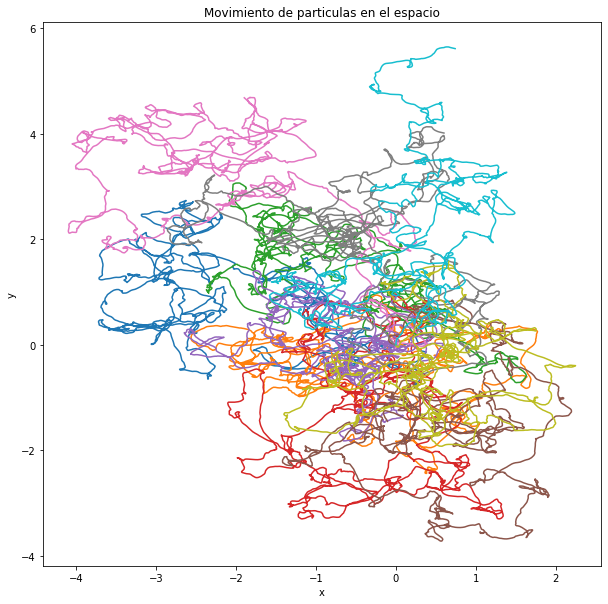

In [28]:
#graficar trayectorias para sistemas con mas de una particula (tambien se puede hacer para una sola)
plt.figure(figsize=(10, 10))
for i in data.index.unique():
    plt.plot(data.loc[i]["x"].to_numpy(), data.loc[i]["y"].to_numpy(), label=f"orbita id={i}")
#plt.plot(data["x"].to_numpy(), data["y"].to_numpy(), label="xy")
#plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.title("Movimiento de particulas en el espacio")

In [42]:
print(dif.loc[0]["t"].to_numpy()[-1]/dif_dt)

4166.0


In [47]:
#volver a ejecutar si se quiere cambiar el color
R = 1.0
col = np.random.uniform(0, 0.9, (len(data.index.unique()), 3))
print(np.shape(col))

dt = data.loc[0]["t"].to_numpy()[1] - data.loc[0]["t"].to_numpy()[0] 

delta = dt*2.5
Moleculas = data[(data["t"]/delta)==np.floor(data["t"]/delta)] #? lo implemente asi porque no me funcionaba con el modulo (data["t"]%delta==0)
#TODO: Mejorarlo para que no se pierdan cuadros en el proceso

cuadros = len(Moleculas.loc[0])
print(cuadros)

(1, 3)
630


/usr/lib/python3/dist-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(
MovieWriter ffmpeg unavailable; using Pillow instead.
/usr/lib/python3/dist-packages/matplotlib/animation.py:889: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


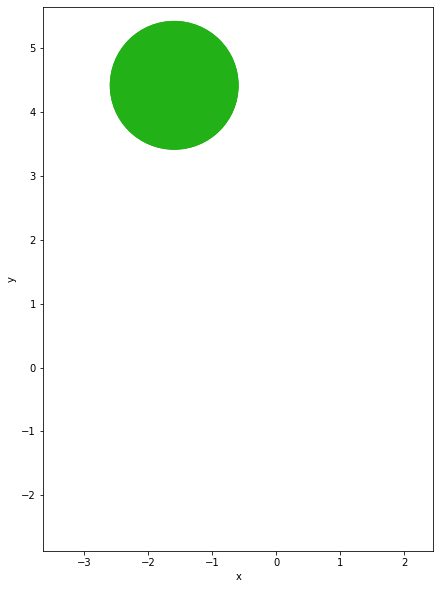

In [48]:
# Define the animation function
def animate(i):
    ax.clear()
    ax.set_aspect('equal')
    ax.set_xlim(Moleculas["x"].min()-R, Moleculas["x"].max()+R)
    ax.set_ylim(Moleculas["y"].min()-R, Moleculas["y"].max()+R)
    plt.xlabel("x")
    plt.ylabel("y")
    for j in data.index.unique():
        Molecula = Moleculas.loc[j]
        circle = plt.Circle((Molecula["x"].iloc[i], Molecula["y"].iloc[i]),  R, color=col[j], fill=True)
        ax.add_artist(circle)
    #circle = plt.Circle((0, 0), 50, color="black", fill=False)
    ax.add_artist(circle)
    

# Create the animation
fig, ax = plt.subplots(figsize=(10, 10))
anim = animation.FuncAnimation(fig, animate, frames=cuadros, interval=100, repeat=False)

#! solo se ve la animacion en cuando se guarda en un archivo
#! cambiar nombre 
# Save the animation
#anim.save("../outp/dif2.gif", savefig_kwargs={'facecolor':'white'})